# Auxiliary

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import project
from project.utils import *

In [3]:
%load_ext autoreload
%autoreload 2

# Models

In [6]:
from project.models.pbc import Box
from project.models.lj import LJFluid
from project.models.chain import GaussianChain
from project.models.ising import IsingModel
from project.models.nematic import NematicLattice

## LJ Fluid

In [73]:
lj = LJFluid(dim = 2)
x = lj.init_coords(4, init_try = 5000)

In [74]:
lj.energy(x)

-2.6171842482564043

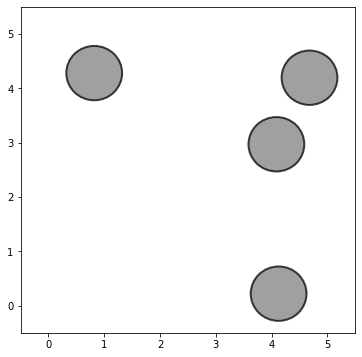

In [75]:
lj.draw_config(x)

In [101]:
idx, new = lj.step(x)

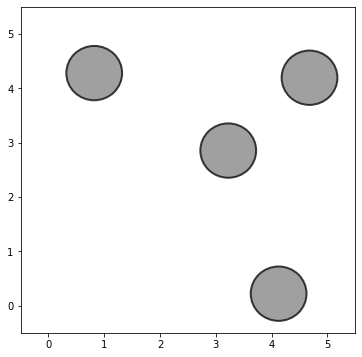

In [102]:
lj.draw_config(new)

## Gaussian Chain

In [110]:
chain = GaussianChain(r0 = 1.5, k = 10.0, L = 5)

chain.params

{'sig': 1.0, 'eps': 1.0, 'r0': 1.5, 'k': 10.0, 'L': 5}

In [114]:
N = 50
x = chain.init_coords(N)

chain.energy(x)

chain.energy_idx(x, 1)

-5.665211996199572

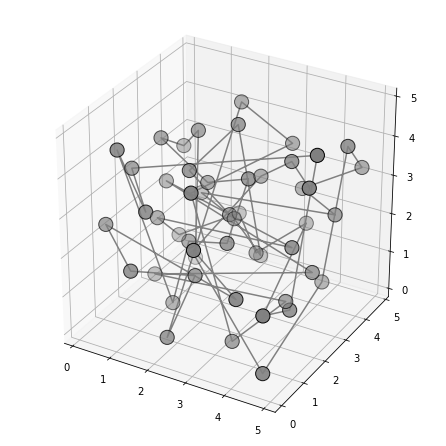

In [115]:
chain.draw_config(x)

In [118]:
%time chain.oprm(x)

CPU times: user 980 µs, sys: 361 µs, total: 1.34 ms
Wall time: 1.03 ms


37.57190312986356

In [119]:
chain.step(x)

(20, array([[2.5       , 2.5       , 2.5       ],
        [1.78576823, 1.94434093, 3.6962926 ],
        [2.39472596, 3.06357278, 4.48780417],
        [2.43229024, 4.06283342, 0.60586816],
        [2.139785  , 3.32731791, 1.88001792],
        [0.82521527, 4.0487988 , 1.84298095],
        [4.66713304, 3.49069596, 2.61587601],
        [3.39525086, 4.28336364, 2.55268065],
        [4.65103679, 4.79599018, 3.19316151],
        [4.8086211 , 3.751936  , 4.2585807 ],
        [4.28345998, 3.65930949, 0.66058859],
        [4.7670955 , 0.0556205 , 0.40288287],
        [0.71946631, 3.93195276, 0.11940332],
        [1.34971941, 3.06626352, 4.06899237],
        [0.4913851 , 3.82632909, 3.10174755],
        [0.65387026, 2.58031383, 3.92092064],
        [1.65335337, 2.95847754, 2.86829264],
        [2.95123323, 2.56254947, 3.50762731],
        [2.88061325, 1.73732047, 2.25702349],
        [1.58235965, 2.22531397, 1.68570927],
        [0.66879914, 1.89595586, 0.14701352],
        [0.58555088, 0.8710414

## Ising Model

In [131]:
ising = IsingModel(h = 1.0)

ising.params

{'h': 1.0, 'J': 1.0}

In [132]:
x = ising.init_coords(4)

ising.energy(x)

2.0

In [133]:
%time ising.energy_idx(x, 0)

CPU times: user 83 µs, sys: 8 µs, total: 91 µs
Wall time: 86.1 µs


-1.0

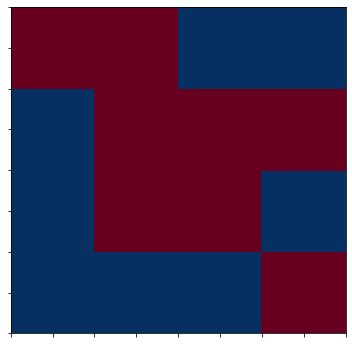

In [134]:
ising.draw_config(x)

In [135]:
ising.oprm(x)

0.0

In [137]:
ising.step(x)

(4, array([[-1, -1, -1,  1],
        [ 1,  1,  1, -1],
        [-1,  1,  1,  1],
        [ 1,  1, -1, -1]]))

## Nematic Lattice 

In [306]:
nem = NematicLattice()

In [307]:
x = nem.init_coords(3)

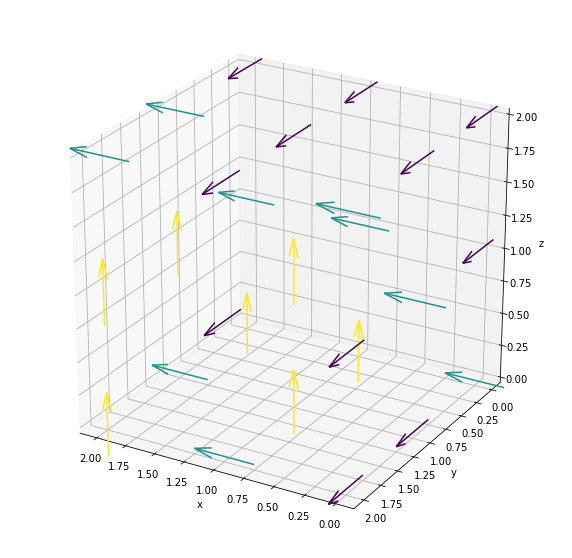

In [308]:
nem.draw_config(x, figsize = (10, 10))

In [309]:
%time idx, new = nem.step(x)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 215 µs


In [313]:
np.unravel_index(idx, (3, 3, 3))

(0, 2, 1)

In [315]:
x[0,2,1]

array([0., 0., 1.])

In [314]:
new[0,2,1]

array([1., 0., 0.])

In [297]:
%time nem.energy_idx(x, idx)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 96.6 µs


-2.0

In [298]:
%time nem.energy(new)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 418 µs


-18.5

# MCMC

In [4]:
from project.models.pbc import Box
from project.models.lj import LJFluid
from project.models.chain import GaussianChain
from project.models.ising import IsingModel
from project.models.nematic import NematicLattice

/Users/sfriedowitz/anaconda3/envs/mlearn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sfriedowitz/anaconda3/envs/mlearn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sfriedowitz/anaconda3/envs/mlearn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sfriedowitz/anaconda3

## Metropolis

In [5]:
from project.mcmc.metropolis import MetropolisSampler

In [6]:
model = NematicLattice(J = 1.5, h = 5)

x0 = model.init_coords(5)

met = MetropolisSampler(model, x0, temperature = 2.5, stride = 100)

In [7]:
met.run(50000, verbose = 5000)

Step 0 / 50000
Step 5000 / 50000
Step 10000 / 50000
Step 15000 / 50000
Step 20000 / 50000
Step 25000 / 50000
Step 30000 / 50000
Step 35000 / 50000
Step 40000 / 50000
Step 45000 / 50000


In [ ]:
plt.plot(met.steps, met.etraj)

plt.show()

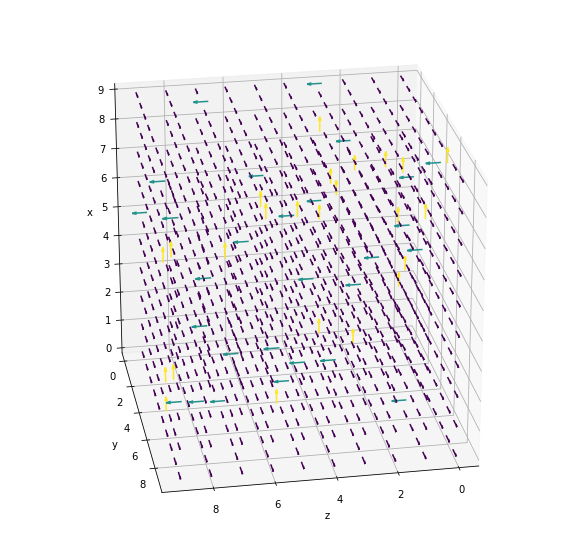

In [121]:
met.model.draw_config(met.traj[0], figsize = (10, 10))

-0.92827165


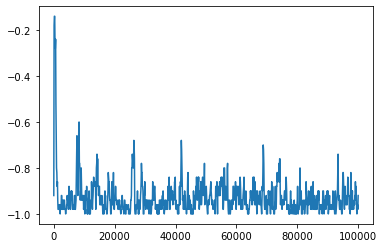

In [111]:
oprm = [model.oprm(c) for c in met.traj]
print(np.mean(oprm))

plt.plot(met.steps, oprm)

plt.show()

## REMC

In [93]:
from project.mcmc.metropolis import ReplicaMetropolisSampler

In [102]:
model = IsingModel(J = 2.5)

x0 = model.init_coords(10)

remc = ReplicaMetropolisSampler(model, x0, temperatures = np.arange(1.0, 5.5, 1.0), stride = 10)

In [103]:
remc.run(5, 5000, verbose = 1000)

In [104]:
remc.etrajs

[array([-0.15, -0.3 , -0.45, ..., -2.5 , -2.5 , -2.5 ]),
 array([-0.15, -0.35, -0.45, ..., -2.3 , -2.3 , -2.3 ]),
 array([-0.15, -0.25, -0.3 , ..., -1.3 , -1.4 , -1.45]),
 array([-0.15, -0.35, -0.5 , ..., -0.9 , -0.95, -0.95]),
 array([-0.15, -0.4 , -0.4 , ..., -0.55, -0.5 , -0.5 ])]

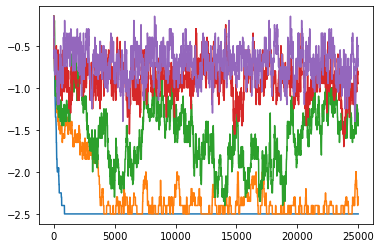

In [106]:
for i in range(len(remc.etrajs)):
    plt.plot(remc.steps, remc.etrajs[i])
    
plt.show()

## Wang Landau

In [104]:
from project.mcmc.metropolis import ReplicaMetropolisSampler